# Aula 08 - Séries Temporais

# Métodos de regressão

Material original: Prof. Dr. Eduardo Lobo Lustosa Cabral

Adaptação e atualização: Prof. Dr. Vitor Alex Oliveira Alves

## 1. Objetivos

Apresentar modelos de regressão para ajustar uma série temporal e realizar previsões.

O conceito básico da regressão é que prevemos valores futuros de uma série temporal assumindo que ela tem uma relação linear com outras séries temporais. Por exemplo:

- Prever vendas mensais usando o gasto total com publicidade como característica;
- Prever a demanda diária de eletricidade usando temperatura e o dia da semana como características;
- Prever consumo de algum produto usando valores de consumo anteriores.

## Importação das principais bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## 2. Regressão linear

A regressão linear é amplamente utilizada na prática e se adapta naturalmente até mesmo a tarefas de previsão complexas.


### 2.1 Modelo simples de regressão linear

No caso mais simples, o modelo de regressão consiste de uma relação linear entre a variável de previsão e uma  única característica, como por exemplo:

$$ \hat y_t = \beta_0 + \beta_1 x_t $$

onde $\hat y_t$ é a variável que se deseja prever no instante de tempo $t$, $x_t$ é a característica no instante $t$ usada para realizar a previsão, $\beta_0$ e $\beta_1$ são os coeficientes do modelo de previsão.

Do ponto de vista de aprendizado de máquina, durante o treinamento, o algoritmo de regressão aprende valores para os parâmetros $\beta_0$ e $\beta_1$ que melhor se ajustam aos dados da série. 

O algoritmo normalmente usado se chama mínimos quadrados, pois calcula valores para os coeficientes do modelo que minimizam o erro quadrático entre os dados da série e as suas previsões.


### 2.2 Regressão linear múltipla

Quando são usadas duas ou mais características, o modelo é chamado de modelo de regressão múltipla. A forma geral de um modelo de regressão múltipla é dada por:

$$ \hat y_t = \beta_0 + \beta_1 x_{1,t} + \beta_2 x_{2,t} + ... + \beta_n x_{n,t}$$

onde $\hat y_t$ é a amostra que se deseja prever no instante de tempo $t$, $x_{j,t}$ é a $j$-ésima característica no instante $t$ usada para realizar a previsão, e $\beta_j$ é o $j$-ésimo coeficiente do modelo de previsão.


### 2.3 Método dos mínimos quadrados

Na prática, dispomos de uma série temporal mas não sabemos os valores dos coeficientes $\beta_i$ que ajustam o modelo. Esses coeficientes precisam ser estimados a partir dos dados.

O método dos mínimos quadrados calcula os coeficientes do modelo minimizando uma função de custo, que é a soma dos quadrados dos erros, ou seja:

$$J(\mathbf{\beta}) = \sum_{t=0}^{N} e_t^2$$

em que $J(\mathbf{\beta})$ é a função de custo, que depende de todos os coeficientes do modelo (vetor $\mathbf{\beta}$), $N$ é o número de amostras da série e $e_t$ é o erro de previsão da amostra da série no instante de tempo $t$

O erro é definido por:

$$e_t = y_t - \hat y_t = y_t - (\beta_0 + \beta_1 x_{1,t} + \beta_2 x_{2,t} + ... +  \beta_n x_{k,t})$$

onde $y_t$ é o valor real da série no instante de tempo $t$.

Para calcular os coeficientes do modelo qualquer método de otimização pode ser usado.

 ### 3. Características
 
Existem diversas possibilidades para as características usadas em um modelo de regressão linear. 

Obviamente, as características usadas em um determinado modelo dependem da série que está sendo analisada. Porém, existem algumas características que são mais comumentemente usadas:

1. Instantes de tempo;
2. Dados da série atrasados;
3. Vetores de tempo senoidal/cossenoidal;
4. Variáveis fictícias ("dummy");
5. Outras


### 3.1 Instantes de tempo

Os instantes de tempo são caracteríticas que se pode obter diretamente do índice de tempo. 

A característica de tempo mais básica é o **"dummy" de tempo**, que conta os passos de tempo da série do início ao fim.

Um modelo que usa os instantes de tempo como características é capaz de determinar **tendências** na série.

* *Tendência linear* Uma tendência linear pode ser modelada simplesmente por $ \hat y_t = \beta_0 + \beta_1 t$, em que $t = 0, 1, 2,..., N$.

* *Tendência quadrática* Uma tendência quadrática pode ser modela por $ \hat y_t = \beta_0 + \beta_1 t + \beta_2 t^2$.


### 3.2 Exemplo 1 - Tendência linear

Vamos usar a série de "Milk Production" do Kaggle (https://www.kaggle.com/code/naffyy/milk-production-data). Tentaremos estimar a tendência dessa série, considerando variação linear.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carrega dados em um DataFrame Pandas
df_milk = pd.read_csv('/content/drive/MyDrive/Datasets/monthlyMilkProduction.csv')
print('Dimensão dos dados:', df_milk.shape)
df_milk.head()

Dimensão dos dados: (228, 9)


,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
0,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
2,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
3,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
4,1995,May,4.470,73.730,2.227,0.8967,5,25,125


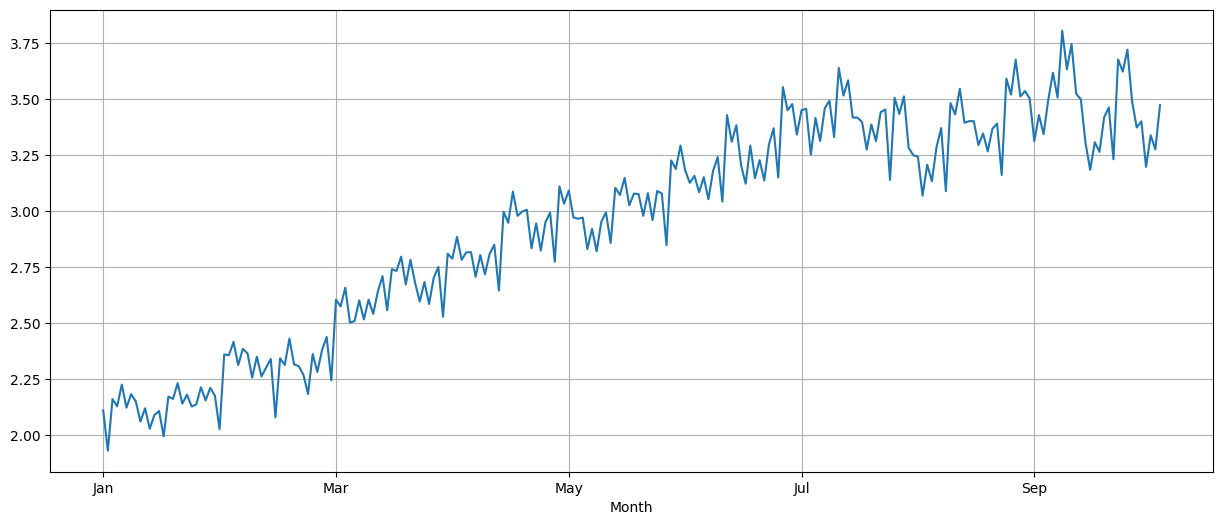

In [4]:
# Separa coluna da data-hora
date_time = df_milk.pop('Month')
# Visualização gráfica
plot_features = df_milk['Milk.Prod']
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize = (15, 6))
plt.grid(True)
plt.show()

In [5]:
# Elimina último dado que é NaN
df_milk = df_milk.iloc[1:-1]

Prepara dados de entrada $\to$ cada linha corresponde às características de um instante de tempo.

In [13]:
# Prepara dados de entrada
N = len(df_milk)

# vetor de tempo dummy
t = np.linspace(0, N-1, num=N, endpoint=False)

# dados de entrada
x = np.reshape(t, (N, 1))

# dados de saída
y = np.reshape(np.array(df_milk['Milk.Prod']), (N, 1))

print(f'Dimensão dos dados de entrada = {x.shape}')
print(f'Dimensão dos dados de saída = {y.shape}')

Dimensão dos dados de entrada = (226, 1)
Dimensão dos dados de saída = (226, 1)


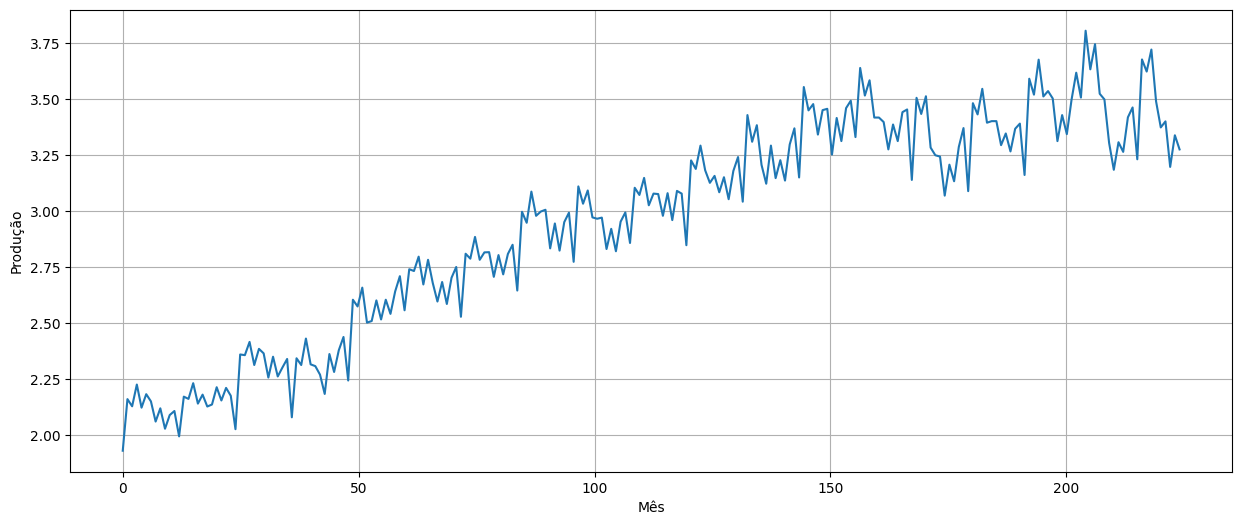

In [14]:
plt.figure(figsize = (15, 6))
plt.plot(t, y)
plt.xlabel('Mês')
plt.ylabel('Produção')
plt.grid(True)
plt.show()

In [15]:
# Importa otimizador
from tensorflow.keras import optimizers

# Define parâmetros da regressão a serem calculados 
b = tf.Variable(0.0, name='bias')
W = tf.Variable(tf.random.normal((1,1), seed=1), name="weight")

# Imprime valores iniciais de W e b
print('W inicial =', W.numpy().T)
print('b inicial =', b.numpy().T)

# Define modelo linear e função de custo
@tf.function
def custom_loss() :
    y_prev = W*x + b
    return tf.reduce_mean(tf.square(y - y_prev))

# Define o otimizador como sendo o RMSprop com taxa de aprendizado 0.01
opt = optimizers.RMSprop(0.002)

# Minimiza funçãp de custo usand n_epocas
n_epocas = 10000
for _ in range(n_epocas):    
    opt_operation = opt.minimize(custom_loss, var_list=[W, b])

# Imprime resultado
print('W final =', W.numpy().T)
print('b final =', b.numpy().T)

W inicial = [[0.6396971]]
b inicial = 0.0
W final = [[0.0078223]]
b final = 2.1853862


Erro médio absoluto percentual = 5.27%


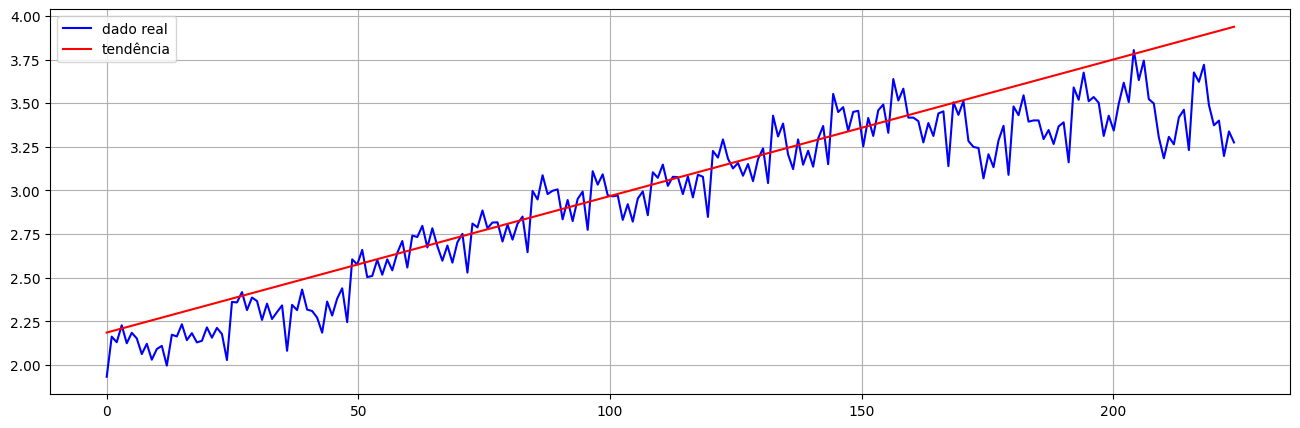

In [16]:
# Cálculo da tendência
y_prev = W*x + b

# Calcula erro médio absoluto percentual
erroA = 100*np.sum(np.abs(y_prev - y)/np.mean(y))/N

# Imprime erro
print(f'Erro médio absoluto percentual = {erroA:.2f}%')

# Realiza gráfico dos resultados 
plt.figure(figsize = (16,5))
plt.plot(x, y, 'b', label='dado real')
plt.plot(x, y_prev, 'r', label='tendência')
plt.grid(True)
plt.legend()
plt.show()

### 3.3 Exemplo 2 - Valores atrasados da série

Vamos novamente usar a série de "Milk Production" do Kaggle (https://www.kaggle.com/code/naffyy/milk-production-data) para ajustar um modelo baseado em valores passados para essa série.

Observa-se que essa série apresenta uma sazonalidade de 1 ano, assim, é natural pensarmos em usar os valores mensais de 12 meses anteriores como características.

Vamos criar um novo dataframe com novas colunas, sendo que cada nova coluna representa um valor atrasado da série.

Para criar uma característica que representa um valor atrasado da série podemos usar a função `shift` do Pandas. 

Como essa série apresenta uma tendência de crescimento é conveniente inlcuir um termo de tendência da mesma forma que feito no exemplo anterior.

O modelo que vamos usar é o seguinte:

$$ \hat y_t = \beta_0 t + \beta_1 y_{t-1} + \beta_2 y_{t-2} + ... + \beta_{12} y_{t-12}$$

In [18]:
# Cria novo dataframe
df_milk2 = pd.DataFrame(df_milk['Milk.Prod'].copy())

# vetor de tempo dummy
N = len(df_milk2)
t = np.linspace(0, N, num=N, endpoint=False, dtype=int)

# Inclui coluna de tempo nos dados
df_milk2['Time'] = np.reshape(t, (N, 1))
df_milk2.head()

,Milk.Prod,Time
1,1.932,0
2,2.162,1
3,2.130,2
4,2.227,3
5,2.124,4


In [24]:
# Criando as colunas com os atrasos de tempo (lags)
for lag in range(1, 13):
  df_milk2['Lag_'+str(lag)] = df_milk2['Milk.Prod'].shift(lag)
df_milk2.head(13)

,Milk.Prod,Time,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
1,1.932,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.162,1,1.932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.130,2,2.162,1.932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.227,3,2.130,2.162,1.932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.124,4,2.227,2.130,2.162,1.932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.184,5,2.124,2.227,2.130,2.162,1.932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.152,6,2.184,2.124,2.227,2.130,2.162,1.932,NaN,NaN,NaN,NaN,NaN,NaN
8,2.062,7,2.152,2.184,2.124,2.227,2.130,2.162,1.932,NaN,NaN,NaN,NaN,NaN
9,2.121,8,2.062,2.152,2.184,2.124,2.227,2.130,2.162,1.932,NaN,NaN,NaN,NaN
10,2.030,9,2.121,2.062,2.152,2.184,2.124,2.227,2.130,2.162,1.932,NaN,NaN,NaN


- Observe que as 12 primeiras linhas apresentam valores ausentes e, portanto, precisam ser retiradas antes de fazermos o ajuste do modelo.

In [26]:
# Prepara dados
y = np.array(df_milk2['Milk.Prod'].iloc[12:])
N = len(y)
y = np.reshape(y, (N, 1))

x = np.array(df_milk2.iloc[12:, 1:])
x = tf.cast(x, dtype=tf.float32)

print('Dimensão das entradas:', x.shape)
print('Dimensão da saída:', y.shape)

Dimensão das entradas: (214, 13)
Dimensão da saída: (214, 1)


In [27]:
# Primeiras 10 linhas dos dados de entrada
print(x[:10])

tf.Tensor(
[[12.     2.109  2.091  2.03   2.121  2.062  2.152  2.184  2.124  2.227
   2.13   2.162  1.932]
 [13.     1.996  2.109  2.091  2.03   2.121  2.062  2.152  2.184  2.124
   2.227  2.13   2.162]
 [14.     2.173  1.996  2.109  2.091  2.03   2.121  2.062  2.152  2.184
   2.124  2.227  2.13 ]
 [15.     2.163  2.173  1.996  2.109  2.091  2.03   2.121  2.062  2.152
   2.184  2.124  2.227]
 [16.     2.233  2.163  2.173  1.996  2.109  2.091  2.03   2.121  2.062
   2.152  2.184  2.124]
 [17.     2.142  2.233  2.163  2.173  1.996  2.109  2.091  2.03   2.121
   2.062  2.152  2.184]
 [18.     2.182  2.142  2.233  2.163  2.173  1.996  2.109  2.091  2.03
   2.121  2.062  2.152]
 [19.     2.129  2.182  2.142  2.233  2.163  2.173  1.996  2.109  2.091
   2.03   2.121  2.062]
 [20.     2.138  2.129  2.182  2.142  2.233  2.163  2.173  1.996  2.109
   2.091  2.03   2.121]
 [21.     2.215  2.138  2.129  2.182  2.142  2.233  2.163  2.173  1.996
   2.109  2.091  2.03 ]], shape=(10, 13), dtype=float3

In [35]:
# Define parâmetros da regressão a serem calculados 
b = tf.Variable(0.0, name='bias')
W = tf.Variable(tf.random.normal((13, 1), seed=5), name="weight")

# Imprime valores iniciais de W e b
print('W inicial =', W.numpy().T)
print('b inicial =', b.numpy().T)

# Define modelo linear e função de custo
@tf.function
def custom_loss():
    y_prev = tf.matmul(x, W) + b
    return tf.reduce_mean(tf.square(y - y_prev))

# Define o otimizador como sendo o RMSprop com taxa de aprendizado 0.01
opt = optimizers.RMSprop(0.001)

# Minimiza função de custo usand n_epocas
n_epocas = 15000
for _ in range(n_epocas):    
    opt_operation = opt.minimize(custom_loss, var_list=[W, b])

# Imprime resultado
print('W final =', W.numpy().T)
print('b final =', b.numpy().T)

W inicial = [[ 0.9292376  -1.4573483  -1.204682    1.8850518   1.4070922   0.70583254
  -1.6180494  -0.3022081  -0.971729   -1.0625279  -0.21137679 -0.23684211
  -0.57369465]]
b inicial = 0.0
W final = [[-6.4065377e-04 -5.9635377e-01 -6.5732658e-01  1.2202276e+00
   1.0169638e+00  3.4546310e-01 -1.1175398e+00  2.6008712e-02
  -3.7713966e-01 -5.2445304e-02  4.4685656e-01  5.4518622e-01
   1.2885214e-01]]
b final = 0.269378


Erro médio quadrático = 0.05674
Erro médio absoluto percentual = 6.28%


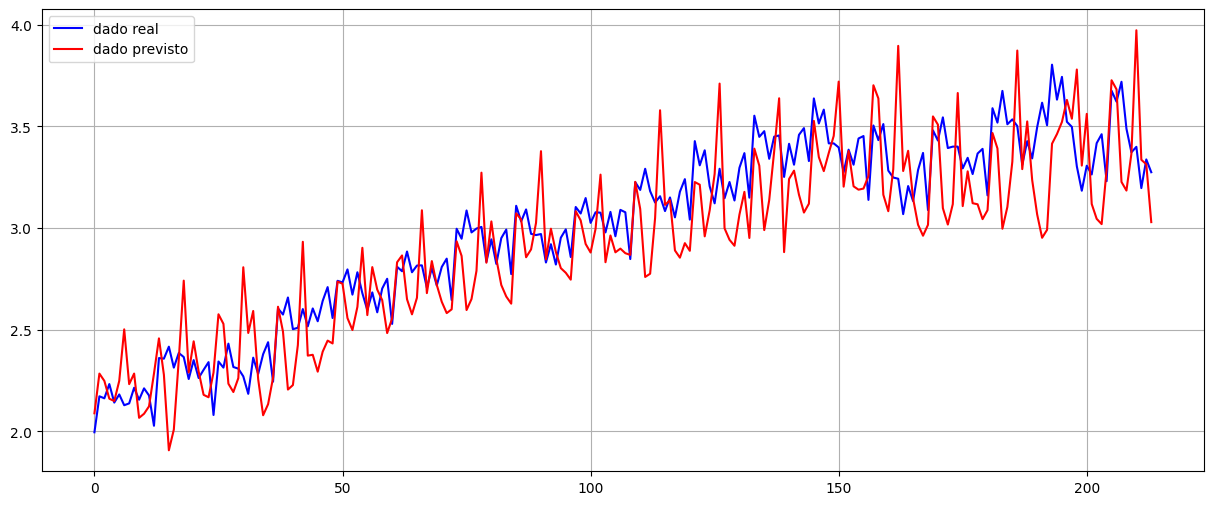

In [36]:
# Calcula previsões com o modelo ajustado
y_prev = tf.matmul(x, W) + b

# Calcula erro quadrático médio
erroQ = tf.reduce_mean(tf.square(y - y_prev)).numpy()
    
# Calcula erro médio absoluto percentual
erroA = 100*np.sum(np.abs(y_prev - y)/np.mean(y))/N

# Imprime erro
print(f'Erro médio quadrático = {erroQ:.5f}')
print(f'Erro médio absoluto percentual = {erroA:.2f}%')

# Realiza gráfico dos resultados 
plt.figure(figsize = (15, 6))
plt.plot(y, 'b', label='dado real')
plt.plot(y_prev, 'r', label='dado previsto')
plt.grid(True)
plt.legend()
plt.show()

### 3.3 Variáveis fictícias ("dummy")

Até agora, assumimos que as carcaterísticas possuem valores numéricos. 

Podemos ter características do tipo variáveis categóricas, que assumem apenas dois valores (ou alguns valores distintos),  como por exemplo, “sim” e “não”.

Uma variável categórica pode surgir, por exemplo, ao prever vendas diárias e for desejado levar em consideração se o dia é feriado ou não. Portanto, a característica assume o valor “sim” em um feriado e “não” em caso contrário.

Esta situação pode ainda ser tratada no âmbito de modelos de regressão múltipla criando uma “variável dummy” que assume o valor 1 correspondente a “sim” e 0 correspondendo a “não”.

Se houver mais de duas categorias, a variável pode ser codificada usando um vetor do tipo "one-hot".

### 3.4 Variáveis de intervenção

Muitas vezes é necessário modelar intervenções que podem afetar a variável a ser prevista. Por exemplo, atividades da concorrência, gastos com publicidade, ação industrial, eventos políticos e outros.

Quando o efeito dura apenas um instante de tempo, pode-se usar uma variável tipo “impulso” $\to$ que é uma variável "dummy" que assume valor "um" no período da intervenção e "zero" em outros. Uma variável de impulso é equivalente a uma variável fictícia para lidar com um valor discrepante.

Outras intervenções têm efeito imediato que podem ser permanentes. Se uma intervenção causa uma mudança de nível (ou seja, o valor da série muda repentina e permanentemente a partir do momento da intervenção), então, usamos uma variável tipo “degrau”. Uma variável "degrau" assume valor zero antes da intervenção e um a partir do momento da intervenção.

Outra forma de efeito permanente é uma mudança de inclinação $\to$ nesse caso a intervenção é tratada usando uma tendência linear por partes.

### 3.5 Termos da Série de Fourier

Uma alternativa ao uso de variáveis "dummy" para tratar sazonalidades, especialmente para longos períodos sazonais, é usar termos da Série de Fourier. 

Como visto, se tivermos sazonalidade podemos usar valores atrasados da série em número igual ao período da sazonalidade como características.

Usando termos da Série de Fourier, muitas vezes precisamos de menos características do que seria necessário se usarmos valores passados da série, especialmente quando a sazonalidade é grande. 

Para períodos sazonais curtos, há pouca vantagem em usar termos da Série de Fourier em relação à valores passados da série.

## 4. Regressão não linear

Embora a relação linear usada até agora seja frequentemente adequada, existem muitos casos em que um modelo não linear é melhor. 

A maneira mais simples de modelar uma relação não linear é transformar a variável a ser prevista $y$, e/ou a carcaterística $x$, antes de estimar o modelo de regressão. 

Aplicando-se transformações nas variáveis pode-se obter um modelo não linear, mas que ainda é linear nos parâmetros. 

A transformação mais comumente usada é o logaritmo. Um modelo "log-log", no caso de se ter uma única característica, é defindo como:

$$ \ln y = \beta_0 + \beta_1 \ln x$$

É importante lembrar que para realizar uma transformação logarítmica em uma variável, todos os seus valores devem ser maiores que zero. No caso de uma variável $x$ possuir alguns valores iguais a zero, então, pode-se usar a transfromação $ \log(x + 1)$.

Outras formas de transformações úteis também podem ser definidas e utilizadas. Alguns exemplos são: 

1. "log-linear", onde somente a característica é transformada;
2. "linear-log", onde somente a variável prevista é transfromada;
3. Funções polinomiais (como já fizemos para ajustar uma tendência quadrática).

Existem casos em que uma transformação simples dos dados não é adequada, assim, um modelo mais complexo tem que ser usado. Uma forma genérica de representar esses casos é a seguinte:

$$ g(y) = f(x)$$

onde $g(y)$ é uma função não linear da saída e $f(x)$ é uma função não linear das características. 


### 4.1 Exemplo - Regressão não linear

Vamos utilizar dados da população na região da África Central e Sul, fornecidos pelo Banco Mundial (https://data.worldbank.org/indicator/SP.POP.TOTL?locations=XM), para realizar previsão de crescimento populacional na próxima década.

In [37]:
ano = ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969",
       "1970","1971","1972","1973","1974","1975","1976","1977","1978","1979",
       "1980","1981","1982","1983","1984","1985","1986","1987","1988","1989",
       "1990","1991","1992","1993","1994","1995","1996","1997","1998","1999",
       "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
       "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
       "2020","2021"]

africa_sul = ["130836765","134159786","137614644","141202036","144920186",
              "148769974","152752671","156876454","161156430","165611760",
              "170257189","175100167","180141148","185376550","190800796",
              "196409937","202205766","208193045","214368393","220740384",
              "227305945","234058404","240999134","248146290","255530063",
              "263161451","271050065","279184536","287524258","296024639",
              "304648010","313394693","322270073","331265579","340379934",
              "349605660","358953595","368440591","378098393","387977990",
              "398113044","408522129","419223717","430246635","441630149",
              "453404076","465581372","478166911","491173160","504604672",
              "518468229","532760424","547482863","562601578","578075373",
              "593871847","609978946","626392880","643090131","660046272",
              "677243299","694665117"]

africa_central =["96396419","98407221","100506960","102691339","104953470",
                 "107289875","109701811","112195950","114781116","117468741",
                 "120269044","123184308","126218502","129384954","132699537",
                 "136173544","139813171","143615715","147571063","151663853",
                 "155882270","160223588","164689764","169279422","173991851",
                 "178826553","183785612","188868567","194070079","199382783",
                 "204803865","210332267","215976366","221754806","227692136",
                 "233807627","240114179","246613750","253302310","260170348",
                 "267214544","274433894","281842480","289469530","297353098",
                 "305520588","313985474","322741656","331772330","341050537",
                 "350556886","360285439","370243017","380437896","390882979",
                 "401586651","412551299","423769930","435229381","446911598",
                 "458803476","470898870"]

pop = np.array(africa_central).astype(float)
ano = np.array(ano).astype(float)
print('Dimensão dos dados:', ano.shape, pop.shape)

Dimensão dos dados: (62,) (62,)


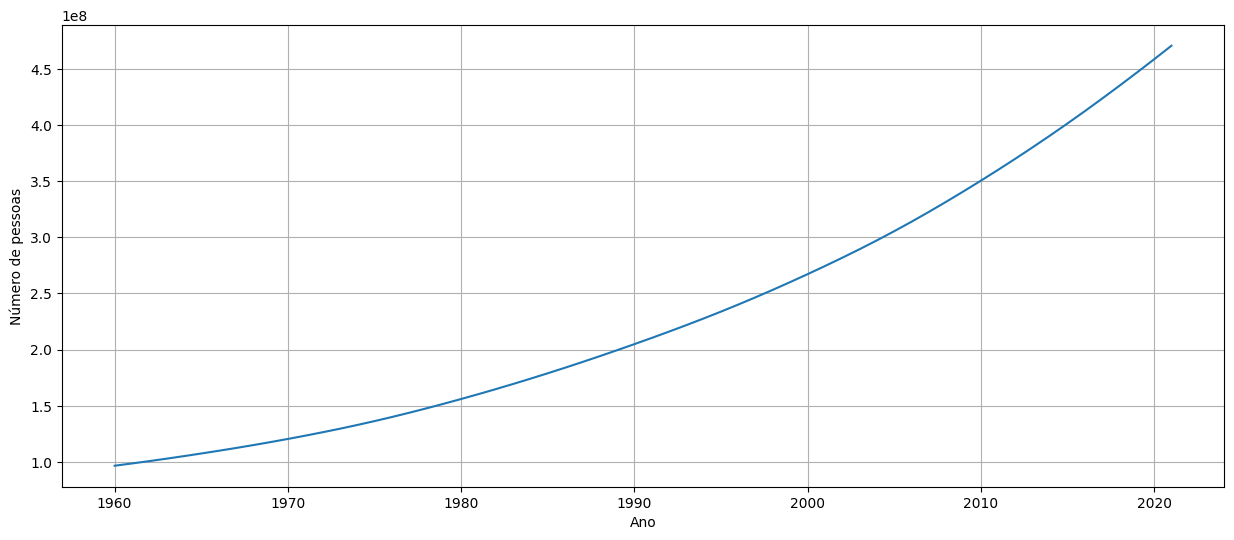

In [38]:
# Gráfico da população versus tempo
plt.figure(figsize=(15, 6))
plt.plot(ano,pop)
plt.xlabel('Ano')
plt.ylabel('Número de pessoas')
plt.grid(True)
plt.show()

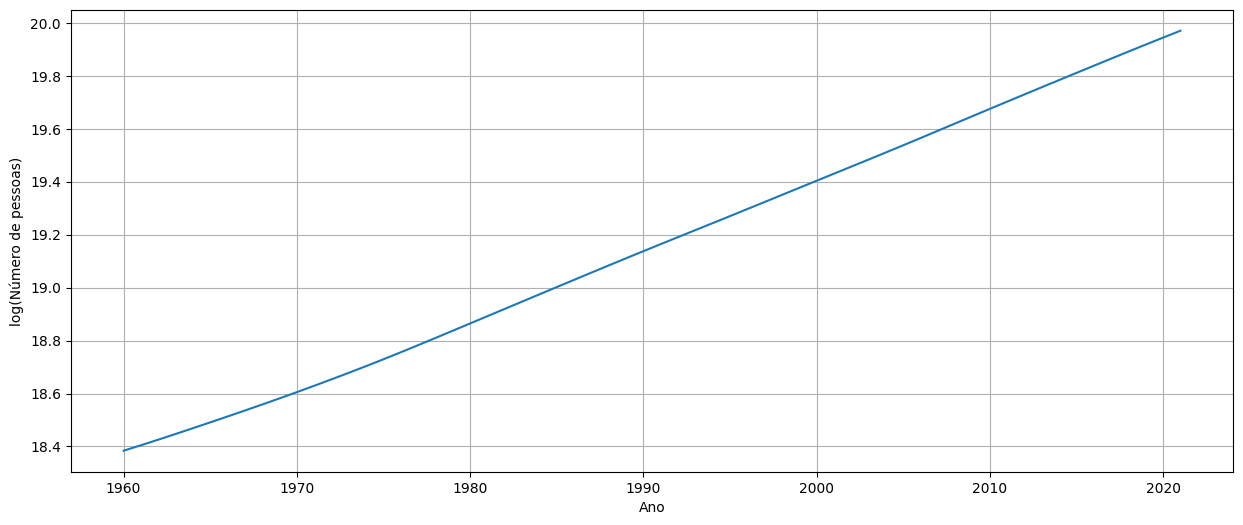

In [39]:
# Gráfico do logaritmo natural da população versus tempo
plt.figure(figsize=(15, 6))
plt.plot(ano, np.log(pop))
plt.xlabel('Ano')
plt.ylabel('log(Número de pessoas)')
plt.grid(True)
plt.show()

- Observa-se que o gráfico do logaritmo da população versus tempo se torna uma reta, que é facilmente ajustada por uma equação linear e, portanto, fácil de ser prevista.

#### Modelo

O modelo que iremos usar para ajustar os dados é o seguinte:

$$ \hat y_{t+10} = \beta_1y_t + \beta_0$$

onde $\hat y_{t+10}$ é o logarítmo da previsão da população 10 anos a frente, $y_t$ é o logarítmo da população atual e $\beta_0$ e $\beta_1$ são os coeficientes do modelo

#### Preparação dos dados

Para preparar os dados vamos realizar o seguinte:

1. Criar um `Pandas DataFrame` com os dados da população;
2. Criar uma nova coluna no `DataFrame` com a população atrasada de 10 anos;
3. Calcular o logarítmo das colunas de população.

In [40]:
df_pop = pd.DataFrame(pop, columns=['Population'])
df_pop.head()

,Population
0,96396419.0
1,98407221.0
2,100506960.0
3,102691339.0
4,104953470.0


In [41]:
df_pop['Lag_10'] = df_pop['Population'].shift(10)
df_pop.head(20)

,Population,Lag_10
0,96396419.0,NaN
1,98407221.0,NaN
2,100506960.0,NaN
3,102691339.0,NaN
4,104953470.0,NaN
5,107289875.0,NaN
6,109701811.0,NaN
7,112195950.0,NaN
8,114781116.0,NaN
9,117468741.0,NaN


Vamos retirar as 10 primeiras linhas em razão de possuirem valores ausentes (NaN) e calcular o logarítmo das populações.

In [42]:
# Dados de entrada
y = np.log(df_pop['Population'].iloc[10:])
y = np.expand_dims(y, 1)

# Dados de saída
x = np.log(df_pop['Lag_10'].iloc[10:])
x = np.expand_dims(x, 1)

print(f'Dimensão dos dados de entrada e de saída = {x.shape}, {y.shape}')


Dimensão dos dados de entrada e de saída = (52, 1), (52, 1)


In [43]:
# Define parâmetros da regressão a serem calculados 
b = tf.Variable(0.0, name='bias')
W = tf.Variable(tf.random.uniform((1, 1), seed=1), name="weight")

# Imprime valores iniciais de W e b
print('W inicial=', W.numpy())
print('b inicial=', b.numpy())

# Define modelo linear e função de custo
def custom_loss() :
    y_pred = x*W + b
    return tf.losses.mean_squared_error(y_pred, y)

# Define o otimizador como sendo o RMSprop com taxa de aprendizado 0.01
opt = optimizers.Adam(0.001)

# Minimiza funçãp de custo usand n_epocas
n_epocas = 10000
for _ in range(n_epocas):    
    opt_operation = opt.minimize(custom_loss, var_list=[W, b])

# Imprime resultado
print('W final =', W.numpy())
print('b final =', b.numpy())

W inicial= [[0.2390374]]
b inicial= 0.0
W final = [[0.97579134]]
b final = 0.7242312


Erro médio quadrático = 0.0004626042
Erro médio absoluto percentual = 1.5267393467099153


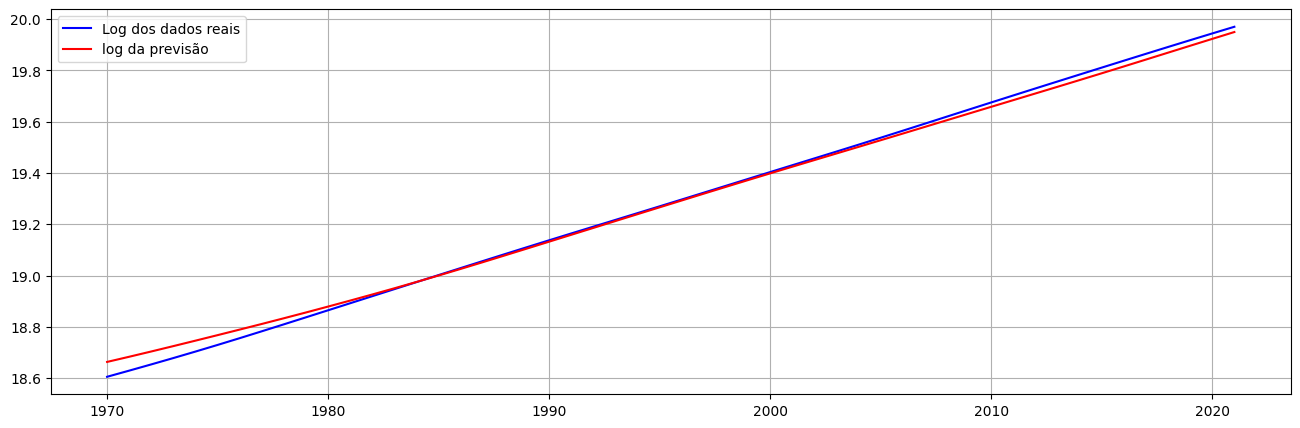

In [44]:
# Calcula resultado do ajuste
y_prev = x*W + b

# Calcula erro médio quadrático no ln da população
erroQ = tf.reduce_mean(tf.square(y - y_prev)).numpy()

# Calcula erro médio absoluto percentual na população 
erroA = 100*np.sum(np.abs(np.exp(y_prev) - np.exp(y)))/np.mean(np.exp(y))/len(y)

# Imprime erro
print('Erro médio quadrático =', erroQ)
print('Erro médio absoluto percentual =', erroA)

# Realiza gráfico dos resultados 
plt.figure(figsize = (16,5))
plt.plot(ano[10:], y, 'b', label='Log dos dados reais')
plt.plot(ano[10:], np.squeeze(y_prev), 'r', label='log da previsão')
plt.grid(True)
plt.legend()
plt.show()

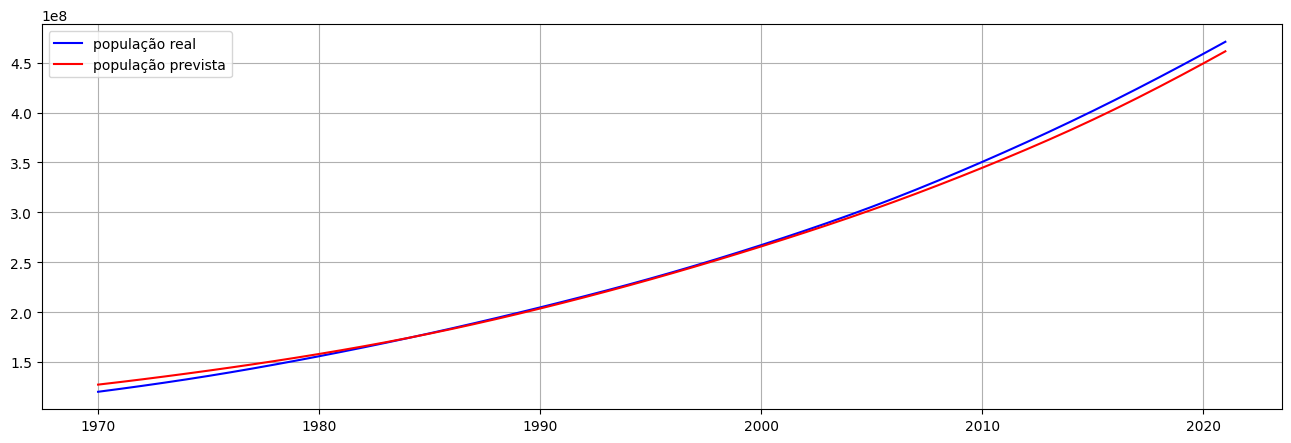

In [45]:
# Realiza gráfico dos resultados 
plt.figure(figsize = (16, 5))
plt.plot(ano[10:], np.exp(y), 'b', label='população real')
plt.plot(ano[10:], np.exp(y_prev), 'r', label='população prevista')
plt.grid(True)
plt.legend()
plt.show()

## 5. Previsão com regressão

A grande vantagem dos modelos de regressão é que eles podem ser usados para capturar relações importantes entre as características usadas e as variáveis a serem previstas.

Um grande desafio, no entanto, é que para gerar previsões futuras, o modelo pode exigir valores futuros de cada característica e isso não é possível $\to$ a solução é usar valores passados. 

Assumindo que estamos interessados em gerar previsões $h$ instantes de tempo no futuro, então, a equação de previsão é dada por:

$$ \hat y_{t+h} = \beta_0 + \beta_1 x_{1,t} + \beta_2 x_{2,t} + ... + \beta_n x_{n,t}$$
 
em que $h$ pode ser $1,2, ...$. 

O conjunto de características é formado por valores observados $h$ instantes de tempo antes de prever $y$ no instante de tempo $t+h$. Dessa forma, todas as características estão disponíveis para fazer a previsão $h$ instantes de tempo no futuro.

Por exemplo, o efeito de uma mudança de política com o objetivo de aumentar a produção pode não ter um efeito instantâneo sobre as despesas de consumo. É mais provável que isso aconteça com um efeito retardado. 

A inclusão de valores defasados das características torna o modelo para gerar previsões mais fácil e mais útil. 

### 5.1 Exemplo - Previsão 6 instantes de tempo no futuro

Como exemplo, vamos utilizar a série de produção de cerveja na Austrália da série "Monthly beer production in Australia" (https://www.kaggle.com/code/rezadastranj/monthly-beer-production-in-australia-forecast/data) e vamos prever a produção de cerveja daqui a 6 meses.

In [49]:
# Carrega conjunto de dados
df_beer = pd.read_csv('/content/drive/MyDrive/Datasets/monthly-beer-production-in-austr.csv')
print('Dimensão dos dados:', df_beer.shape)
df_beer.head()

Dimensão dos dados: (476, 2)


,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


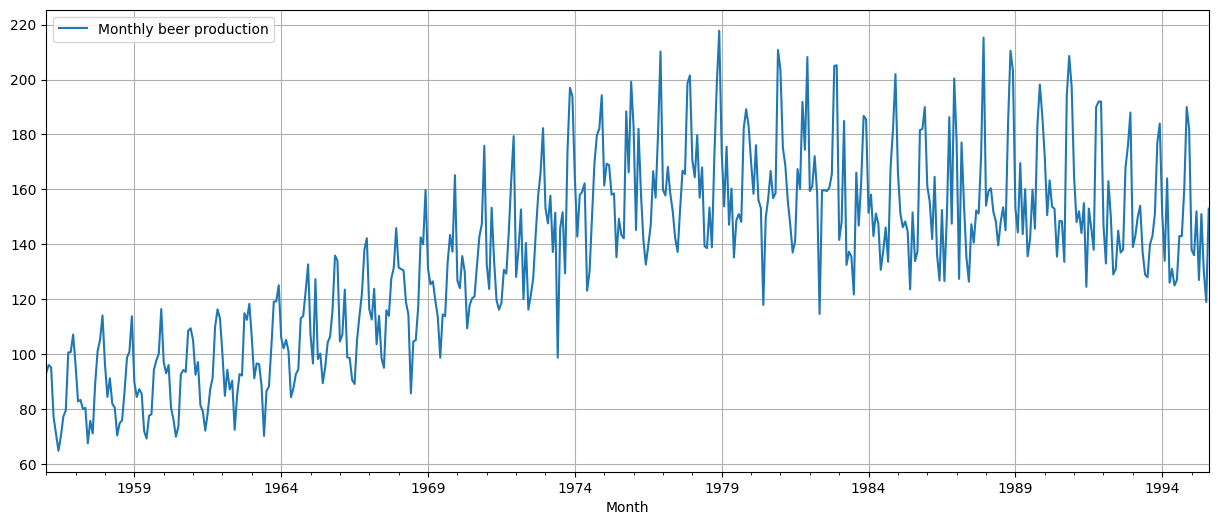

In [50]:
# Separa coluna do mês
month = pd.to_datetime(df_beer.pop('Month'))

# Gráfico dos dados
plot_cols = ['Monthly beer production']
plot_features = df_beer[plot_cols]
plot_features.index = month
_ = plot_features.plot(subplots=True, figsize = (15, 6))
plt.grid(True)

Para prever a produção de cerveja daqui a 6 meses precisamos criar a saída defasada em 6 meses e escolher as caraterísticas usadas na previsão $\to$ vamos usar como características os valores de produção de cerveja em 12 meses passados, que se inicia 6 meses antes da data que se deseja prever.

O modelo utilizado é o seguinte:

$$ \hat y_{t+6} = \beta_0 y_{t} + \beta_1 y_{t-1} + ... + \beta_{12} y_{t-12}$$

In [53]:
# Número de dados na série
N = len(df_beer)

# Cria novo dataframe
df_beer2 = df_beer.copy()

df_beer2.head()

,Monthly beer production,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17
0,93.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
for lag in range(6, 18):
  df_beer2['Lag_'+str(lag)] = df_beer2['Monthly beer production'].shift(lag)

df_beer2.head(20)

,Monthly beer production,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17
0,93.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,64.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,70.1,93.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,77.3,96.0,93.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,79.5,95.2,96.0,93.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.6,77.1,95.2,96.0,93.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Observe que as 16 primeiras linhas apresentam valores ausentes e, portanto, precisam ser retiradas antes de fazermos o ajuste do modelo.

In [56]:
# Prepara dados
y = np.array(df_beer2['Monthly beer production'].iloc[17:])
N = len(y)
y = np.reshape(y, (N, 1))

x = np.array(df_beer2.iloc[17:, 1:])
x = tf.cast(x, dtype=tf.float32)

print('Dimensão das entradas:', x.shape)
print('Dimensão das saídas:', y.shape)

print(x[:10])

Dimensão das entradas: (459, 12)
Dimensão das saídas: (459, 1)
tf.Tensor(
[[107.1 100.7 100.6  79.5  77.3  70.1  64.8  70.9  77.1  95.2  96.   93.2]
 [ 95.9 107.1 100.7 100.6  79.5  77.3  70.1  64.8  70.9  77.1  95.2  96. ]
 [ 82.8  95.9 107.1 100.7 100.6  79.5  77.3  70.1  64.8  70.9  77.1  95.2]
 [ 83.3  82.8  95.9 107.1 100.7 100.6  79.5  77.3  70.1  64.8  70.9  77.1]
 [ 80.   83.3  82.8  95.9 107.1 100.7 100.6  79.5  77.3  70.1  64.8  70.9]
 [ 80.4  80.   83.3  82.8  95.9 107.1 100.7 100.6  79.5  77.3  70.1  64.8]
 [ 67.5  80.4  80.   83.3  82.8  95.9 107.1 100.7 100.6  79.5  77.3  70.1]
 [ 75.7  67.5  80.4  80.   83.3  82.8  95.9 107.1 100.7 100.6  79.5  77.3]
 [ 71.1  75.7  67.5  80.4  80.   83.3  82.8  95.9 107.1 100.7 100.6  79.5]
 [ 89.3  71.1  75.7  67.5  80.4  80.   83.3  82.8  95.9 107.1 100.7 100.6]], shape=(10, 12), dtype=float32)


In [57]:
# Define parâmetros da regressão a serem calculados 
b = tf.Variable(0.0, name='bias', trainable=True)
W = tf.Variable(tf.random.normal((12, 1), seed=1), name="weight", trainable=True)

# Imprime valores iniciais de W e b
print('W inicial =', W.numpy().T)
print('b inicial =', b.numpy().T)

# Define modelo linear e função de custo
def custom_loss() :
    y_pred = tf.matmul(x, W) + b
    return tf.losses.mean_squared_error(y_pred, y)

# Define o otimizador como sendo o RMSprop com taxa de aprendizado 0.01
opt = optimizers.RMSprop(0.001)

# Minimiza funçãp de custo usand n_epocas
n_epocas = 10000
for _ in range(n_epocas):    
    opt_operation = opt.minimize(custom_loss, var_list=[W, b])

# Imprime resultado
print('W final =', W.numpy().T)
print('b final =', b.numpy().T)

W inicial = [[ 1.3587774   0.5417413  -0.86009884 -0.0040246  -0.02824468 -0.5914484
   0.39893135 -1.6332341   0.853612   -0.48501822  0.55934316  2.1453598 ]]
b inicial = 0.0
W final = [[-0.06543054 -0.06123978  0.08933695  0.00934166 -0.06145413  0.2548705
   0.63792175  0.0589244   0.11674093 -0.00843816 -0.08056436  0.09185828]]
b final = 3.132094


(459, 1) (459, 1)
Erro médio quadrático = 114.84125
Erro médio absoluto percentual = 5.914417175425943


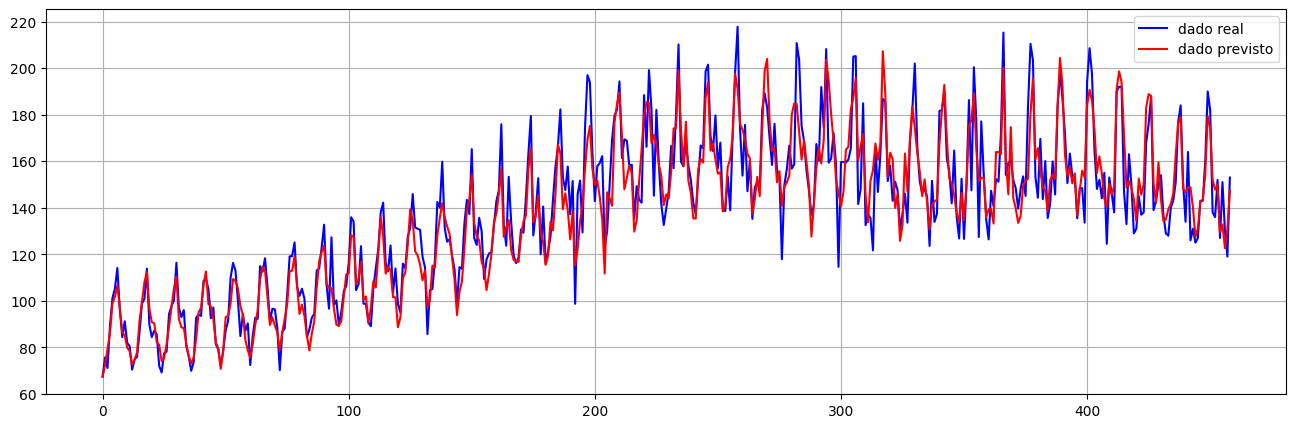

In [58]:
# Calcula resultado do ajuste
y_prev = tf.matmul(x, W) + b
print(y_prev.shape, y.shape)

# Calcula erro médio quadrático
erroQ = tf.reduce_mean(tf.square(y - y_prev)).numpy()

# Calcula erro médio absoluto percentual
erroA = 100*np.sum(np.abs(y_prev - y)/np.mean(y))/N

# Imprime erro
print('Erro médio quadrático =', erroQ)
print('Erro médio absoluto percentual =', erroA)

# Realiza gráfico dos resultados 
plt.figure(figsize = (16,5))
plt.plot(y, 'b', label='dado real')
plt.plot(y_prev, 'r', label='dado previsto')
plt.grid(True)
plt.legend()
plt.show()

## 6. Conclusão

Nessa aula vimos algumas formas de utilizar regressão linear e não-linear para ajustar dados de séries temporais, além de termos visto várias características que podem ser usadas como dados para o modelo de regressão.

Os métodos de regressão são capazes de fornecer resultados satisfatórios, mas dependem muito das características escolhidas. 